In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns

%matplotlib inline 

# Удаление дубликатов в данных

In [2]:
data = pd.DataFrame({"k1": ["one", "two"] * 3 + ["two"], "k2": [1, 1, 2, 3, 3, 4, 4], 
                     "k3": [1, 1, 2, 3, 3, 4, 4], "k4":[1, 1, 1, 1, 1, 1, 1]})
data

,k1,k2,k3,k4
0,one,1,1,1
1,two,1,1,1
2,one,2,2,1
3,two,3,3,1
4,one,3,3,1
5,two,4,4,1
6,two,4,4,1


In [3]:
data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

In [4]:
data.drop_duplicates()

,k1,k2,k3,k4
0,one,1,1,1
1,two,1,1,1
2,one,2,2,1
3,two,3,3,1
4,one,3,3,1
5,two,4,4,1


In [5]:
data.T.drop_duplicates().T

,k1,k2,k4
0,one,1,1
1,two,1,1
2,one,2,1
3,two,3,1
4,one,3,1
5,two,4,1
6,two,4,1


In [8]:
data.drop(data.columns[data.nunique() == 1], axis=1)

,k1,k2,k3
0,one,1,1
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,3
5,two,4,4
6,two,4,4


In [7]:
data.nunique() == 1

k1    False
k2    False
k3    False
k4     True
dtype: bool

# Заполнение пропусков в данных

Nan - маркер отсутствия данных.

In [9]:
float_data = pd.Series([1.2, -3.5, np.nan, 0])
float_data

0    1.2
1   -3.5
2    NaN
3    0.0
dtype: float64

In [10]:
float_data.isna()

0    False
1    False
2     True
3    False
dtype: bool

In [11]:
float_data.notna()

0     True
1     True
2    False
3     True
dtype: bool

Удаление данных с пропусками

In [12]:
data = pd.DataFrame([[1., 6.5, 3., np.nan], [1., np.nan, np.nan, np.nan], [np.nan, np.nan, np.nan, np.nan], 
                     [np.nan, 6.5, 3., np.nan]])
data

,0,1,2,3
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [13]:
data.dropna()

,0,1,2,3


In [14]:
data.dropna(how="all")

,0,1,2,3
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [15]:
data.dropna(axis="columns", how="all")

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [16]:
data.dropna(thresh=2)

,0,1,2,3
0,1.0,6.5,3.0,NaN
3,NaN,6.5,3.0,NaN


Восполнение отсутствующих данных

In [17]:
df = pd.DataFrame(np.random.standard_normal((7, 3)))
df.iloc[:4, 1] = np.nan
df.iloc[:2, 2] = np.nan
df

,0,1,2
0,-0.307202,NaN,NaN
1,-0.117655,NaN,NaN
2,-0.352939,NaN,-0.510576
3,1.363799,NaN,0.497036
4,-0.423363,0.368905,2.781218
5,-1.494799,-1.043138,-1.052962
6,-0.175038,0.605526,0.136508


In [18]:
df.fillna(0)

,0,1,2
0,-0.307202,0.000000,0.000000
1,-0.117655,0.000000,0.000000
2,-0.352939,0.000000,-0.510576
3,1.363799,0.000000,0.497036
4,-0.423363,0.368905,2.781218
5,-1.494799,-1.043138,-1.052962
6,-0.175038,0.605526,0.136508


In [19]:
df.fillna({1: 0.5, 2: 0})

,0,1,2
0,-0.307202,0.500000,0.000000
1,-0.117655,0.500000,0.000000
2,-0.352939,0.500000,-0.510576
3,1.363799,0.500000,0.497036
4,-0.423363,0.368905,2.781218
5,-1.494799,-1.043138,-1.052962
6,-0.175038,0.605526,0.136508


In [20]:
df.fillna(method="bfill")

C:\Users\grkis\AppData\Local\Temp\ipykernel_4320\3896554658.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="bfill")


,0,1,2
0,-0.307202,0.368905,-0.510576
1,-0.117655,0.368905,-0.510576
2,-0.352939,0.368905,-0.510576
3,1.363799,0.368905,0.497036
4,-0.423363,0.368905,2.781218
5,-1.494799,-1.043138,-1.052962
6,-0.175038,0.605526,0.136508


In [21]:
df.fillna(method="bfill", limit=2)

C:\Users\grkis\AppData\Local\Temp\ipykernel_4320\695793777.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="bfill", limit=2)


,0,1,2
0,-0.307202,NaN,-0.510576
1,-0.117655,NaN,-0.510576
2,-0.352939,0.368905,-0.510576
3,1.363799,0.368905,0.497036
4,-0.423363,0.368905,2.781218
5,-1.494799,-1.043138,-1.052962
6,-0.175038,0.605526,0.136508


In [22]:
df.fillna(data.mean())

,0,1,2
0,-0.307202,6.500000,3.000000
1,-0.117655,6.500000,3.000000
2,-0.352939,6.500000,-0.510576
3,1.363799,6.500000,0.497036
4,-0.423363,0.368905,2.781218
5,-1.494799,-1.043138,-1.052962
6,-0.175038,0.605526,0.136508


In [23]:
df.fillna(data.median())

,0,1,2
0,-0.307202,6.500000,3.000000
1,-0.117655,6.500000,3.000000
2,-0.352939,6.500000,-0.510576
3,1.363799,6.500000,0.497036
4,-0.423363,0.368905,2.781218
5,-1.494799,-1.043138,-1.052962
6,-0.175038,0.605526,0.136508


Медиана более устойчива к выбросам

In [24]:
data_all = []
for i in range(1000):
    data = []
    for i in range(1000):
        if np.random.random() >= 0.90:
            data.append(np.random.normal(1, 1, 1)[0])
        else:
            data.append(np.random.normal(1, 10, 1)[0])
    data_all.append(data)
    
data_all = np.array(data_all)

<AxesSubplot:>

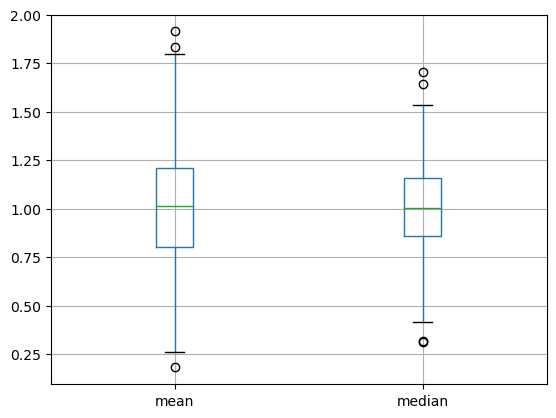

In [25]:
res = pd.DataFrame({"mean": data_all.mean(axis=1), "median": np.median(data_all, axis=1)})
res.boxplot()

Создание дополнительного признака

In [26]:
df["2 is nan"] = df[2].isna().astype(np.int32)
df

,0,1,2,2 is nan
0,-0.307202,NaN,NaN,1
1,-0.117655,NaN,NaN,1
2,-0.352939,NaN,-0.510576,0
3,1.363799,NaN,0.497036,0
4,-0.423363,0.368905,2.781218,0
5,-1.494799,-1.043138,-1.052962,0
6,-0.175038,0.605526,0.136508,0


Замена значений

In [27]:
data = pd.Series([1., -999., 2., -999., 4., 3.])
data

0      1.0
1   -999.0
2      2.0
3   -999.0
4      4.0
5      3.0
dtype: float64

In [28]:
data.replace(-999, np.nan)

0    1.0
1    NaN
2    2.0
3    NaN
4    4.0
5    3.0
dtype: float64

# Кодирование признаков

Бинарные факторы: False == 0, True == 1

In [29]:
data = pd.Series(["male"]*10 + ["female"]*5) 
data

0       male
1       male
2       male
3       male
4       male
5       male
6       male
7       male
8       male
9       male
10    female
11    female
12    female
13    female
14    female
dtype: object

In [30]:
(data == "male").astype(np.int32)

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    0
11    0
12    0
13    0
14    0
dtype: int32

Категориальные факторы: разбиваем по порядку


In [31]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

df = pd.DataFrame(["moscow", "spb", "moscow", "spb", "spb", "spb", "tomsk", "novgorod", "samara", "saratov"])
df

,0
0,moscow
1,spb
2,moscow
3,spb
4,spb
5,spb
6,tomsk
7,novgorod
8,samara
9,saratov


In [32]:
enc = OrdinalEncoder()
enc.fit_transform(df)

array([[0.],
       [4.],
       [0.],
       [4.],
       [4.],
       [4.],
       [5.],
       [1.],
       [2.],
       [3.]])

In [35]:
enc = OrdinalEncoder()
enc.fit_transform(df)

array([[0.],
       [4.],
       [0.],
       [4.],
       [4.],
       [4.],
       [5.],
       [1.],
       [2.],
       [3.]])

Категориальные факторы: разбиваем на много бинарных (one hot encoding)

city_is_moscow: 0/1, city_is_spb: 0/1, city_is_tomsk: 0/1 ... 

In [36]:
ohe = OneHotEncoder()
ohe.fit(df)
ohe.categories_

[array(['moscow', 'novgorod', 'samara', 'saratov', 'spb', 'tomsk'],
       dtype=object)]

In [37]:
pd.DataFrame(ohe.transform(df).toarray(), columns=ohe.categories_)

,moscow,novgorod,samara,saratov,spb,tomsk
0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0
5,0.0,0.0,0.0,0.0,1.0,0.0
6,0.0,0.0,0.0,0.0,0.0,1.0
7,0.0,1.0,0.0,0.0,0.0,0.0
8,0.0,0.0,1.0,0.0,0.0,0.0
9,0.0,0.0,0.0,1.0,0.0,0.0


In [38]:
pd.get_dummies(df)

,0_moscow,0_novgorod,0_samara,0_saratov,0_spb,0_tomsk
0,True,False,False,False,False,False
1,False,False,False,False,True,False
2,True,False,False,False,False,False
3,False,False,False,False,True,False
4,False,False,False,False,True,False
5,False,False,False,False,True,False
6,False,False,False,False,False,True
7,False,True,False,False,False,False
8,False,False,True,False,False,False
9,False,False,False,True,False,False


Цикличные факторы: время дня => позиция на циферблате => sin, cos угла

# Создание новых признаков

Полиномиальные признаки

In [68]:
from sklearn.preprocessing import PolynomialFeatures

In [40]:
X = np.arange(6).reshape(3, 2)
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [41]:
poly = PolynomialFeatures(2)
poly.fit_transform(X)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

Другие преобразования: sin x, ln x

Дискретизация и группировка по интервалам

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

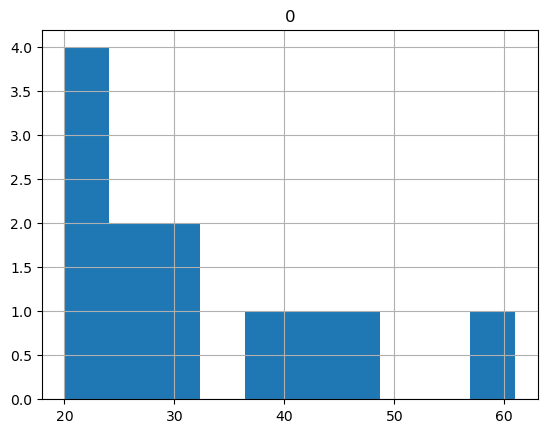

In [42]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]
pd.DataFrame(ages).hist()

In [43]:
bins = [18, 25, 35, 60, 100]
age_categories = pd.cut(ages, bins)
age_categories

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64, right]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [44]:
age_categories.codes

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

# Преобразование данных

Приведение к единой шкале: StandardScaler, MinMaxScaler

In [58]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
data = [[-1, 0], [-0.5, 6], [0, 10], [1, 18]]
scaler = MinMaxScaler()
scaler.fit_transform(data)

array([[0.        , 0.        ],
       [0.25      , 0.33333333],
       [0.5       , 0.55555556],
       [1.        , 1.        ]])

In [47]:
scaler = StandardScaler()
scaler.fit_transform(data)

array([[-1.18321596, -1.30002249],
       [-0.50709255, -0.38235956],
       [ 0.16903085,  0.22941573],
       [ 1.52127766,  1.45296631]])

Логарифмирование, преобразование Бокса-Кокса

C:\Users\grkis\AppData\Local\Temp\ipykernel_4320\1753499592.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, hist= False, kde= True)


<AxesSubplot:ylabel='Density'>

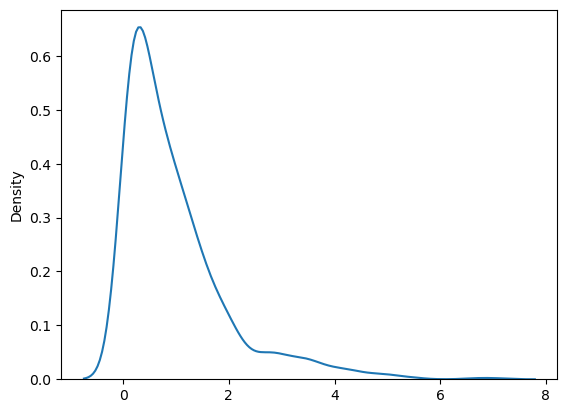

In [48]:
from scipy. stats import boxcox 

data = np.random.exponential(size= 1000)
sns.distplot(data, hist= False, kde= True)

C:\Users\grkis\AppData\Local\Temp\ipykernel_4320\1776627611.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(transformed_data, hist=False, kde=True)


<AxesSubplot:ylabel='Density'>

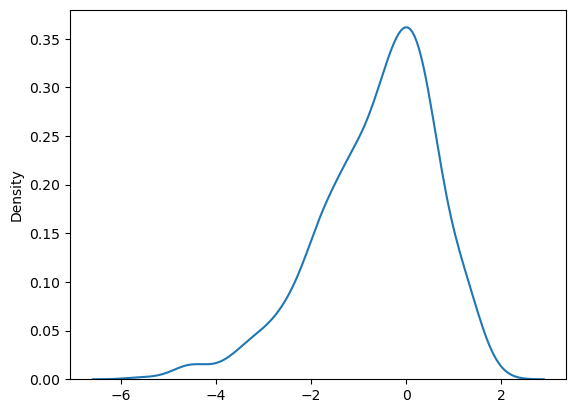

In [49]:
transformed_data = np.log(data) 
sns.distplot(transformed_data, hist=False, kde=True)

C:\Users\grkis\AppData\Local\Temp\ipykernel_4320\2198520673.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(transformed_data, hist=False , kde=True)


<AxesSubplot:ylabel='Density'>

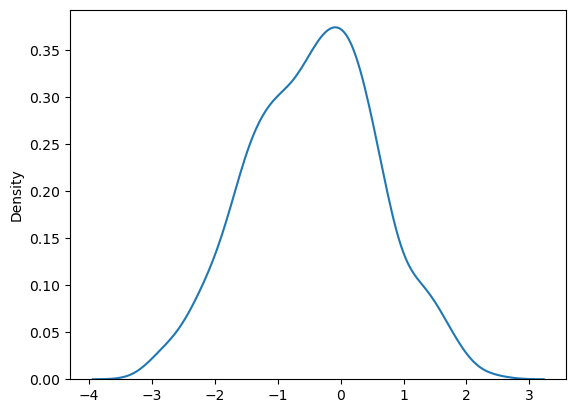

In [50]:
transformed_data, best_lambda = boxcox(data) 

sns.distplot(transformed_data, hist=False , kde=True)

In [51]:
best_lambda

0.22856492045996782

# Домашнее задание

In [21]:
df = pd.read_csv("https://raw.githubusercontent.com/katarina74/ml_lessons/main/lesson_2/data/techparams_train.csv")

In [3]:
df

,index,back-suspension,battery-capacity,charge-time,compression,consumption-mixed,cylinders-order,cylinders-value,engine-feeding,engine-start,...,configurations_front-brake,configurations_safety-rating,configurations_seats,configurations_tank-volume,supergen_year-stop,models_country-from,models_group,models_light-and-commercial,models_male,target
0,0,9,-1.0,36457,9.0,4.3,0,3,4,2006,...,1,2,13,40.0,2018.0,16,3,0,1,2360
1,2,3,-1.0,44872,8.0,-1.0,3,7,4,1982,...,4,2,13,108.0,1993.0,34,3,0,1,3060
2,4,3,-1.0,55927,16.0,4.2,0,4,5,2014,...,4,2,13,55.0,2019.0,35,3,0,1,2648
3,5,0,-1.0,41405,10.3,-1.0,0,4,4,2000,...,4,2,13,55.0,2003.0,10,3,0,1,2513
4,7,8,-1.0,22523,19.0,-1.0,0,4,8,2000,...,4,1,13,62.0,2005.0,10,3,0,1,2703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43240,61224,9,-1.0,34558,11.2,6.6,0,4,4,2004,...,1,2,13,47.0,2016.0,15,3,0,1,2510
43241,61225,3,-1.0,38268,9.6,5.8,0,4,2,2013,...,4,2,13,65.0,2015.0,10,3,0,1,2808
43242,61226,3,-1.0,8958,10.0,9.3,0,4,4,1991,...,4,2,13,55.0,1999.0,16,3,0,1,2520
43243,61227,3,-1.0,20293,8.5,-1.0,0,5,4,2002,...,1,2,13,70.0,2004.0,28,3,0,1,2755


Данные: технические характеристики разных конфигураций автомобилей

Таргет: длина колесной базы конфигурации (в миллиметрах).

## Baseline

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate

In [5]:
X = df.drop(["target"], axis=1)
y = df[["target"]]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=42)

In [6]:
reg = LinearRegression().fit(train_X, train_y)

In [7]:
reg.score(train_X, train_y)

0.4555406785040047

In [8]:
mean_squared_error(reg.predict(train_X), train_y)

29840.121250865304

In [9]:
scores = cross_validate(reg, train_X, train_y, cv=3, 
                        scoring=('neg_mean_squared_error'))

In [10]:
scores

{'fit_time': array([0.07379222, 0.05592036, 0.06183505]),
 'score_time': array([0.01464772, 0.01196551, 0.01097012]),
 'test_score': array([-29836.8590711 , -29618.75539267, -30344.6536926 ])}

In [11]:
mean_squared_error(reg.predict(test_X), test_y)

31021.02439985456

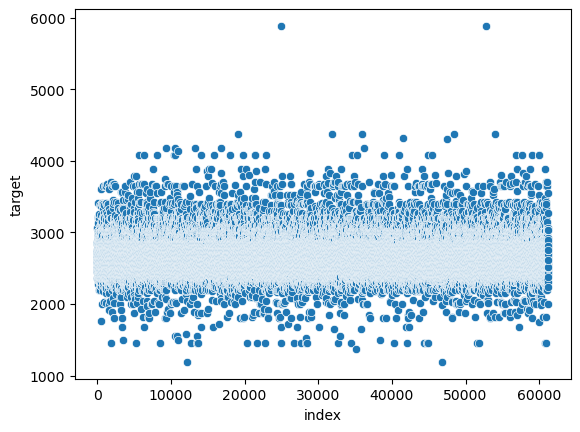

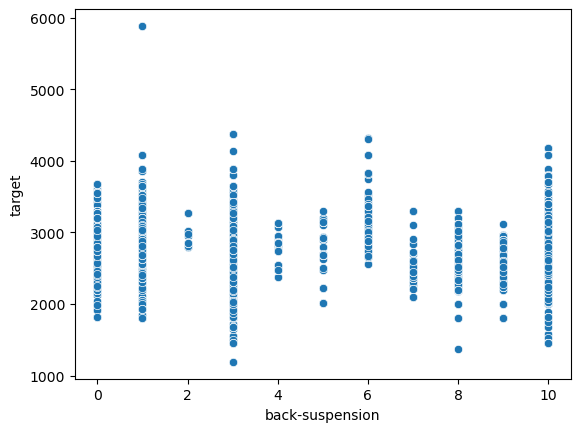

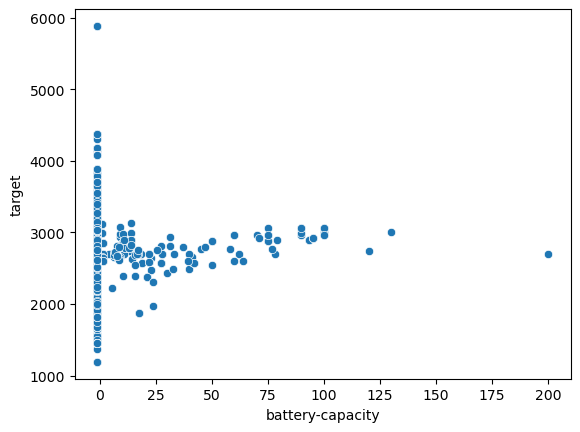

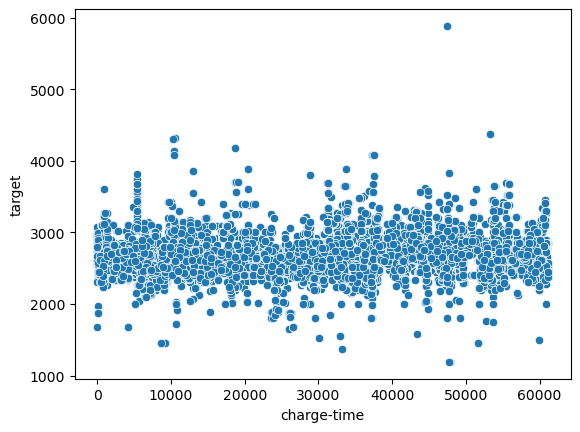

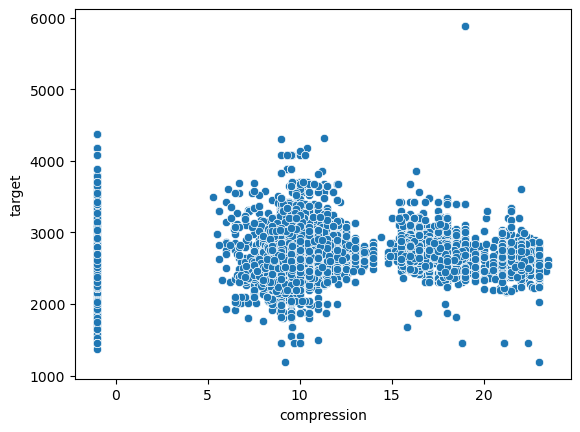

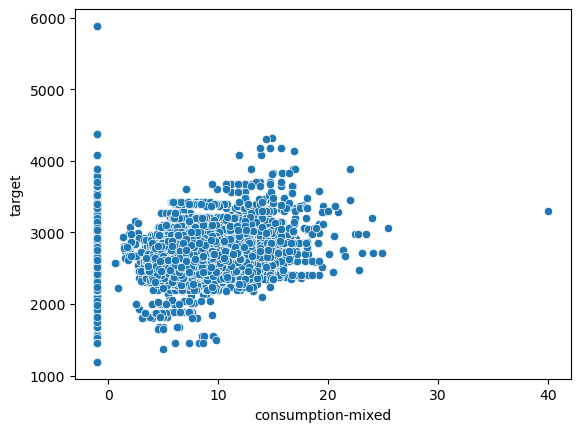

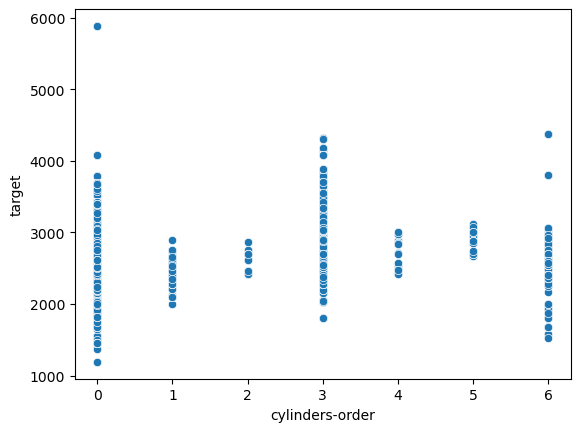

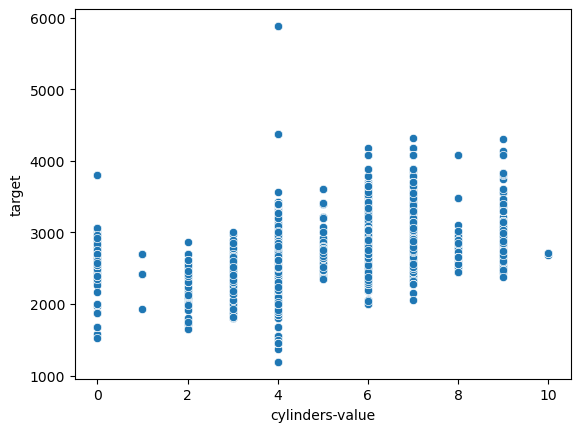

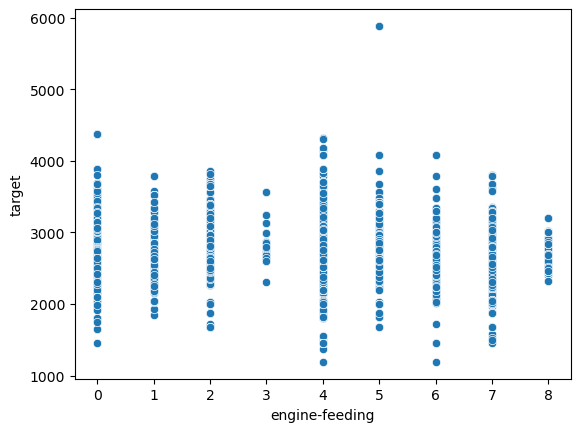

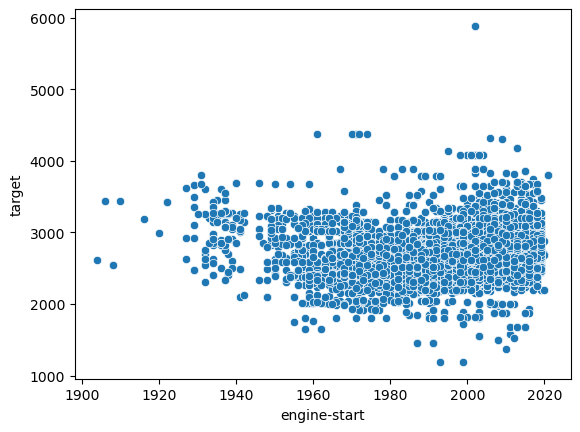

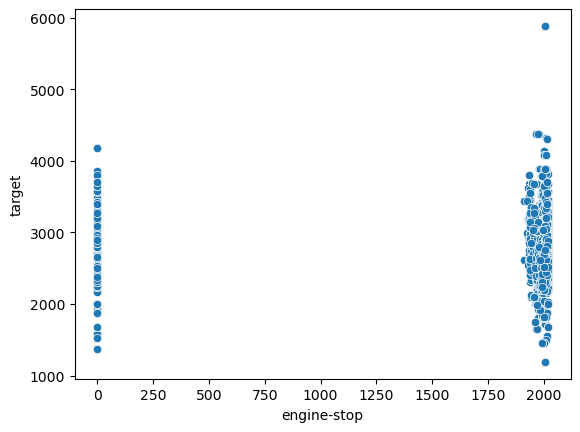

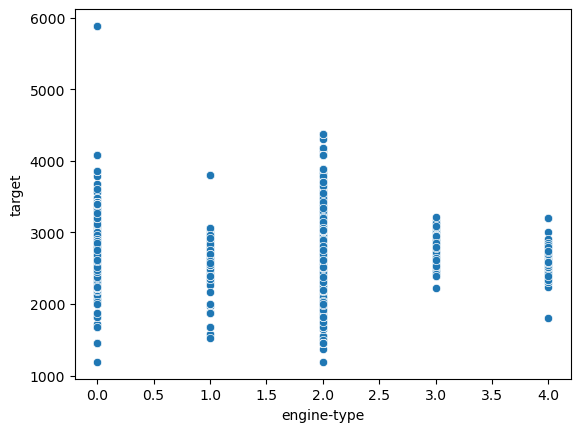

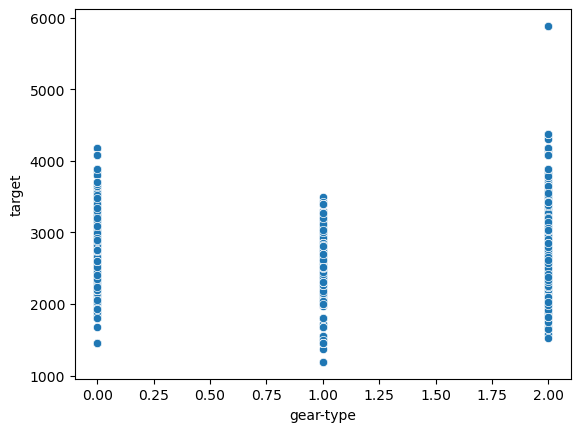

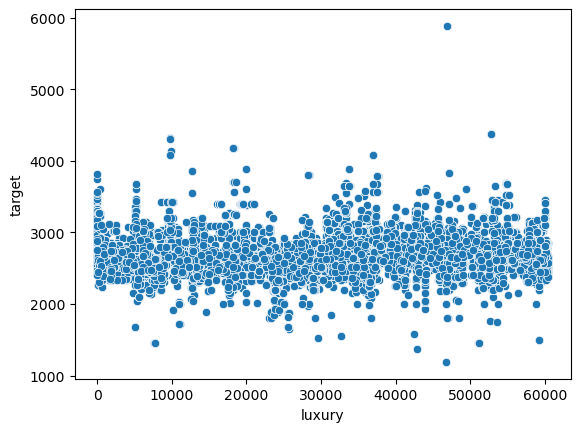

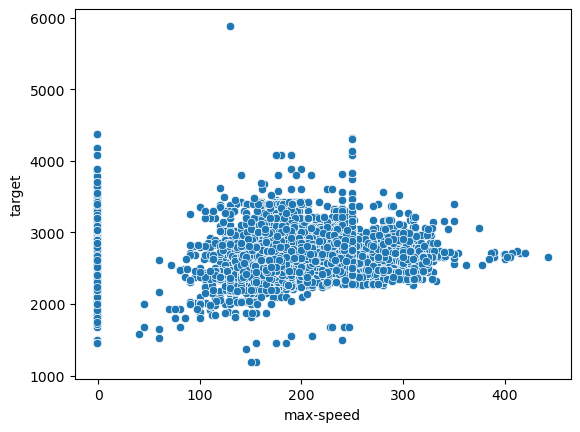

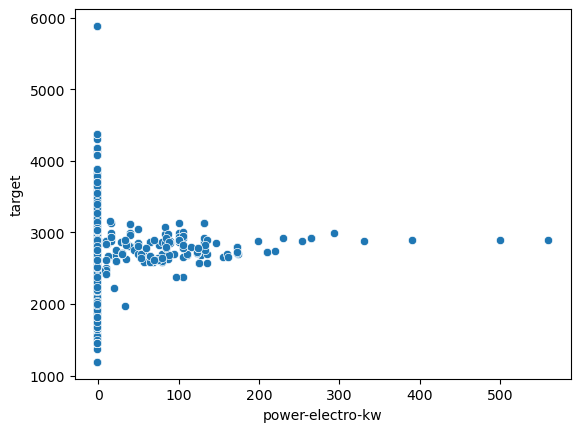

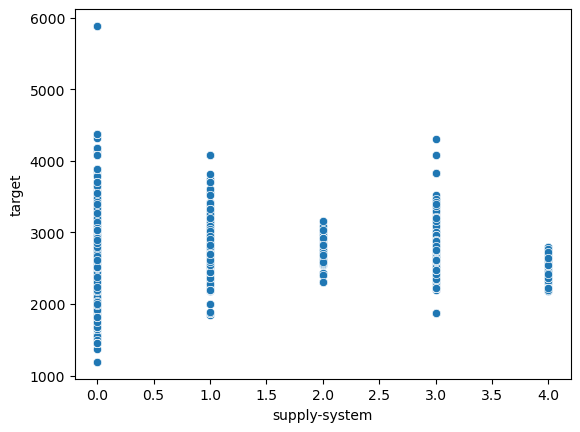

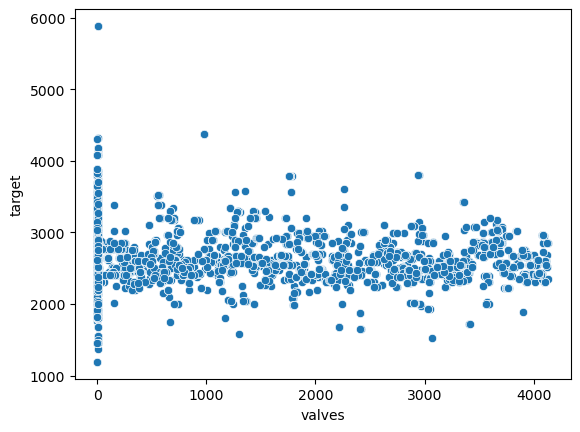

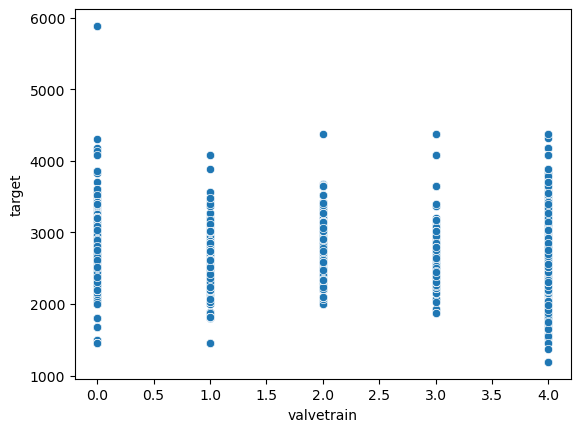

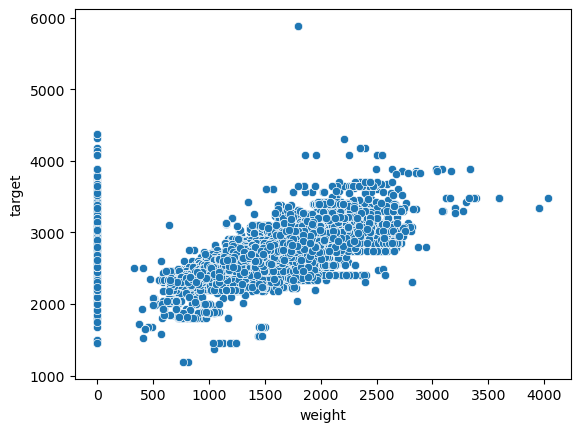

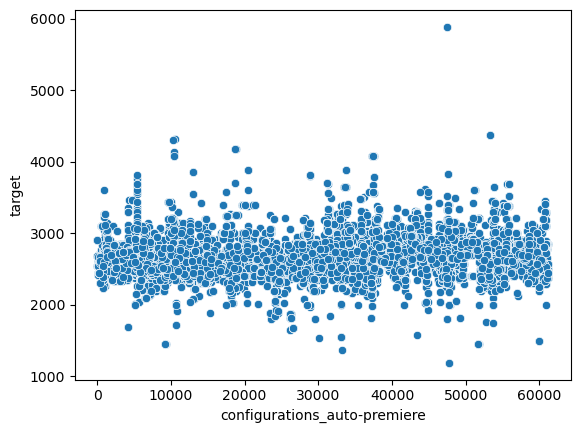

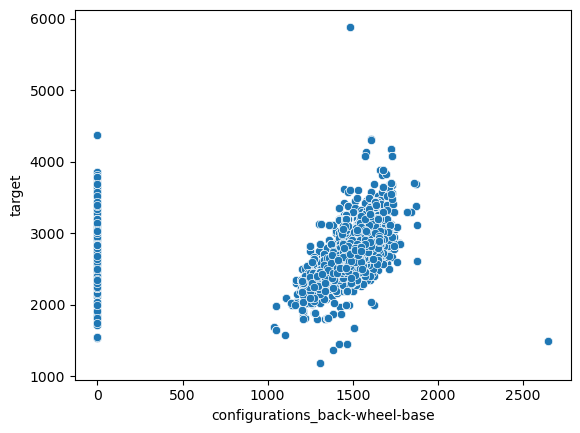

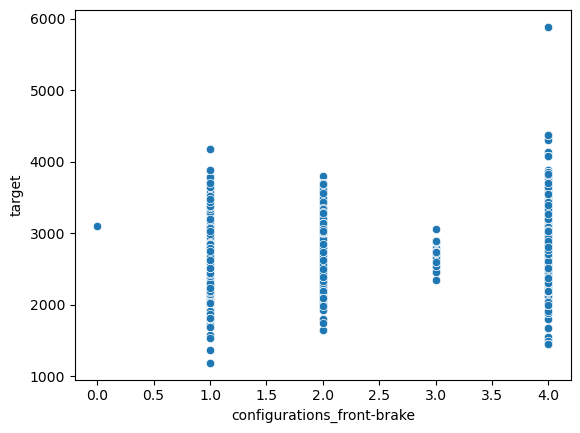

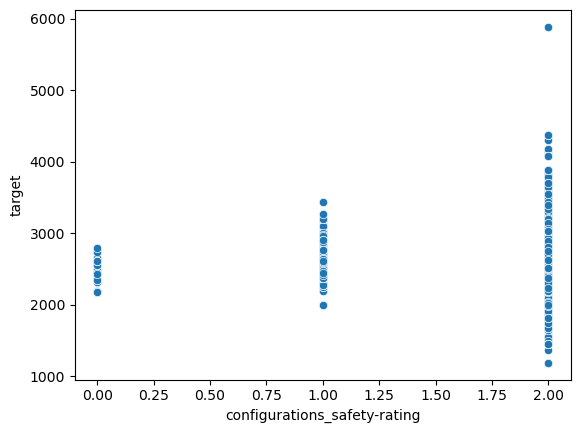

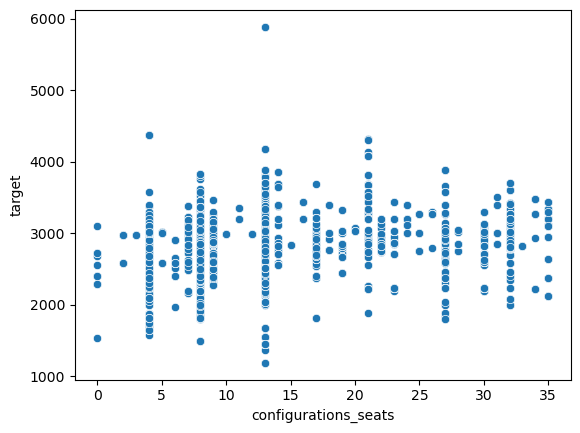

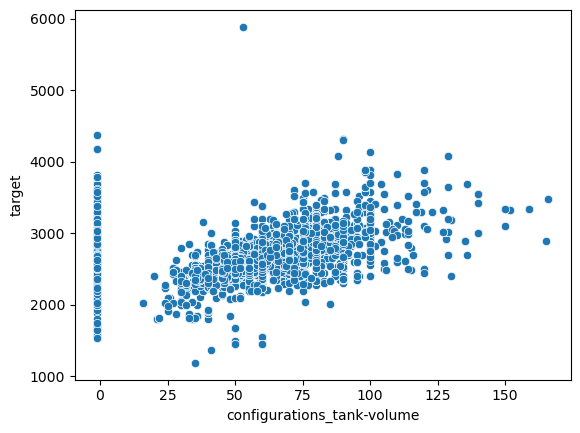

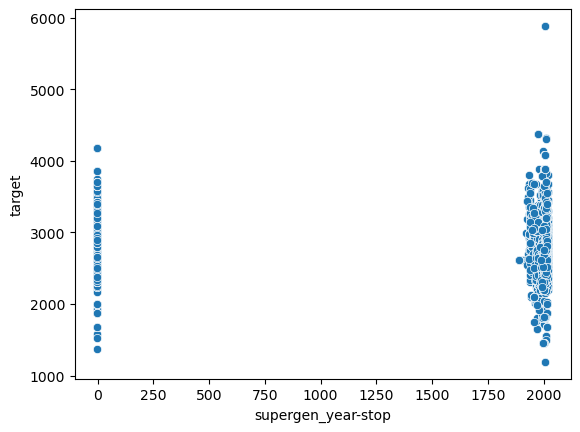

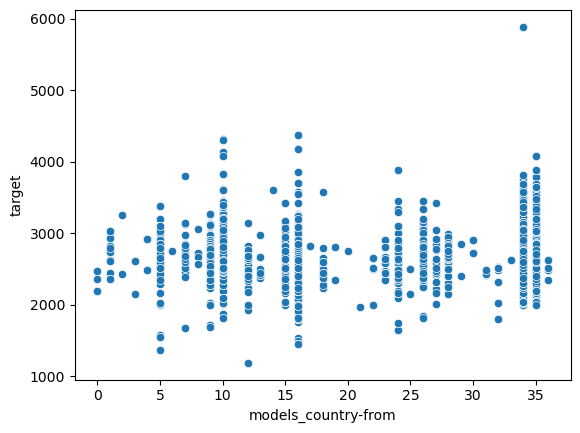

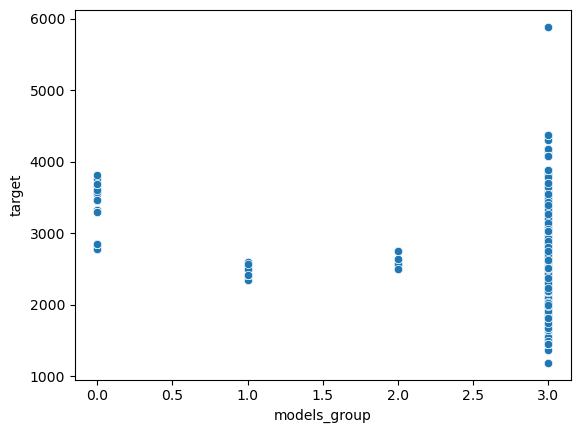

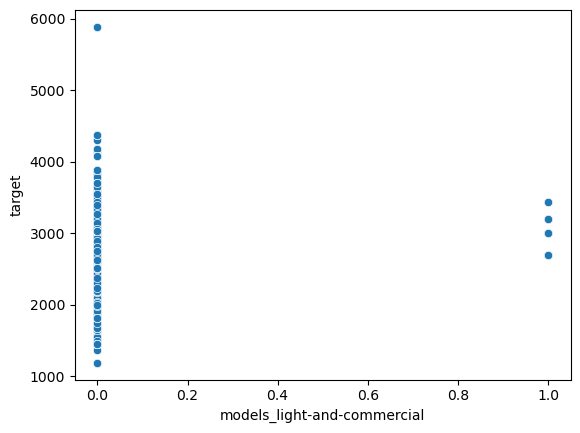

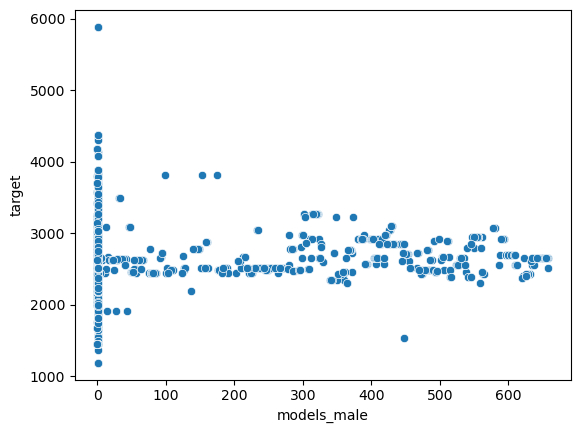

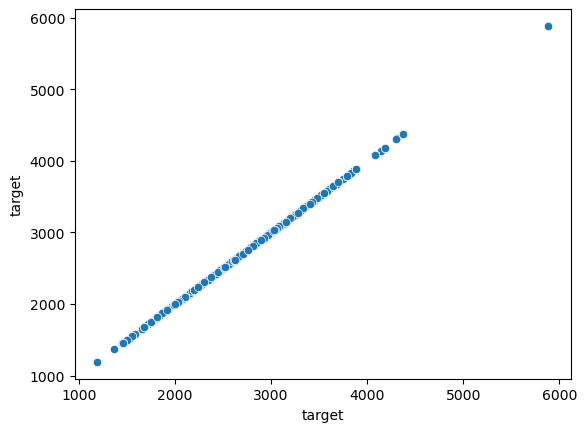

In [17]:
for factor in df.columns:
    sns.scatterplot(data=df, x=factor, y='target')
    plt.show()

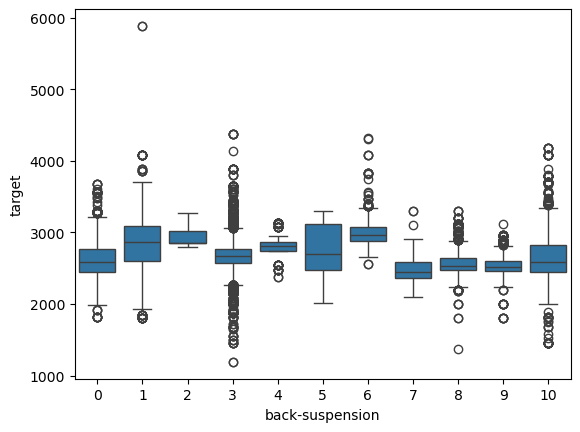

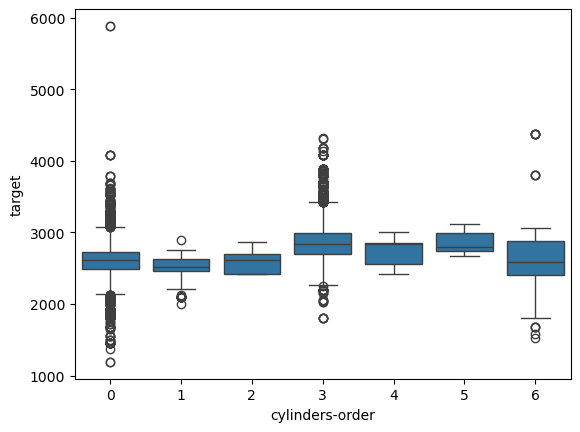

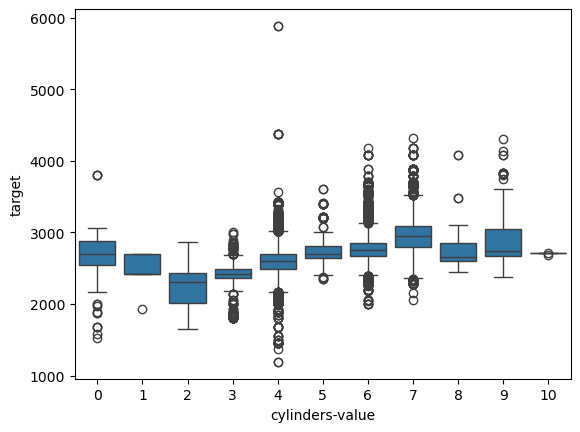

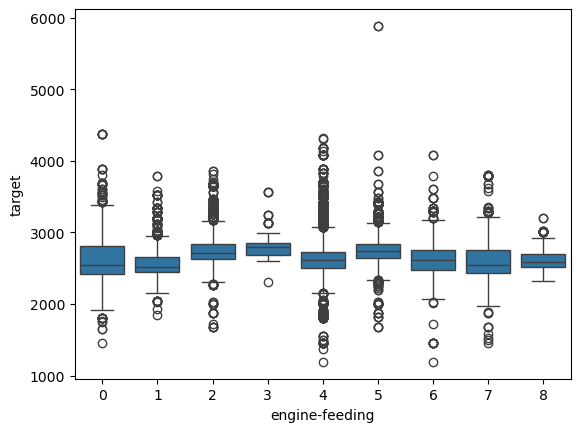

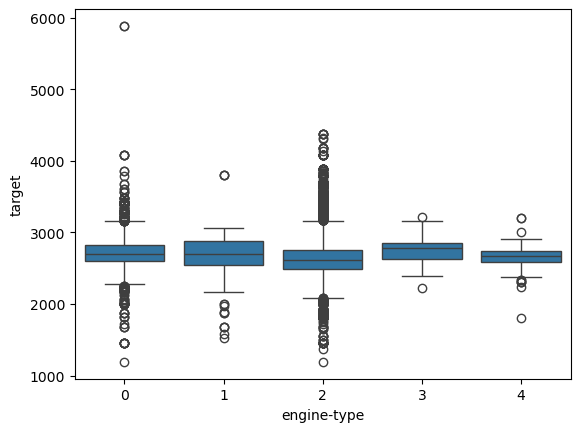

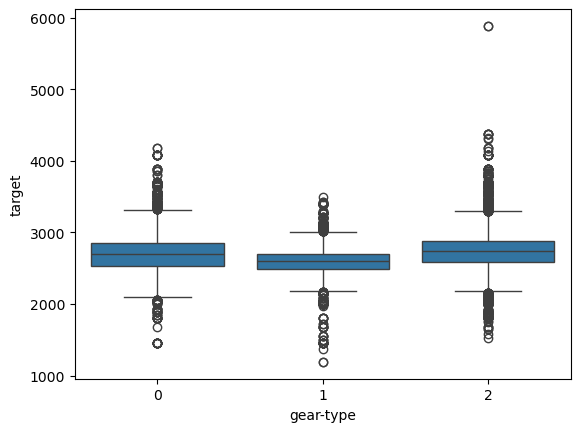

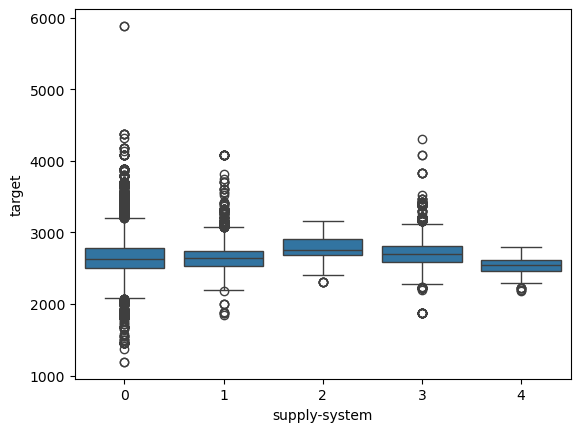

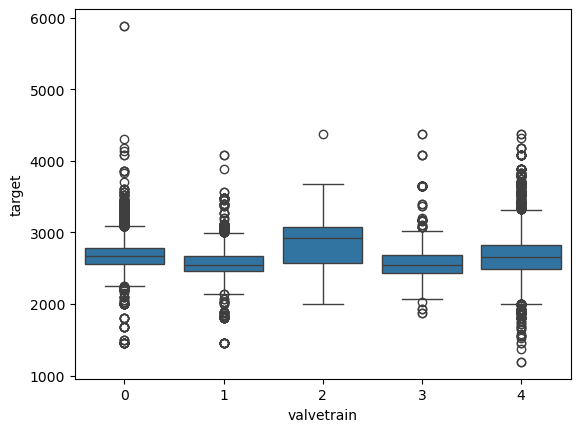

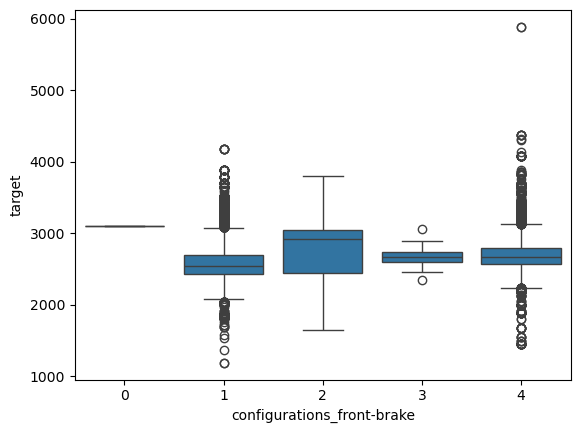

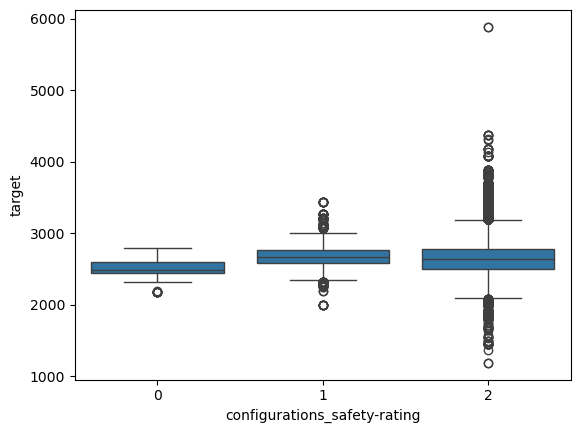

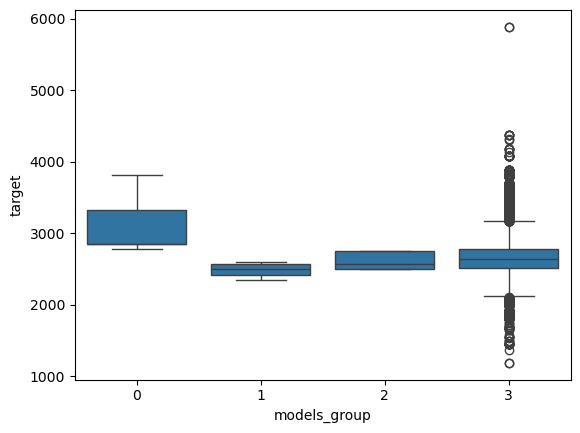

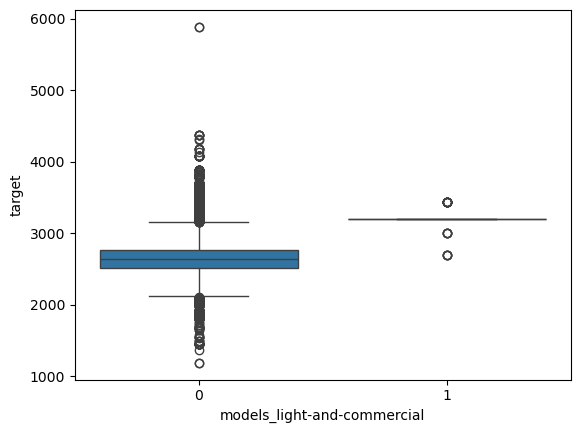

In [15]:
for factor in df.columns[df.nunique() < 15]:
    sns.boxplot(data=df, x=factor, y='target')
    plt.show()

### Удаление пропусков

In [55]:
def score_of_your_data(data):
    y = data.target
    data = data.drop('target', axis=1)
    train_X, test_X, train_y, test_y = train_test_split(data, y, test_size=0.33, random_state=42)
    reg = LinearRegression().fit(train_X, train_y)
    return reg.score(train_X, train_y)

In [22]:
factors = df.corr(method='spearman')['target'][df.corr(method='spearman')['target'] > 0.4]
factors

cylinders-value                   0.492853
weight                            0.537532
configurations_back-wheel-base    0.590767
configurations_tank-volume        0.599780
target                            1.000000
Name: target, dtype: float64

In [23]:
factors_names = factors.index

In [46]:
XX = df[factors_names].replace({0: np.nan, -1.0: np.nan}).dropna()

In [47]:
XX

,cylinders-value,weight,configurations_back-wheel-base,configurations_tank-volume,target
0,3.0,820.0,1300.0,40.0,2360
1,7.0,2350.0,1555.0,108.0,3060
2,4.0,1350.0,1534.0,55.0,2648
3,4.0,1090.0,1495.0,55.0,2513
4,4.0,1410.0,1515.0,62.0,2703
...,...,...,...,...,...
43236,6.0,1375.0,1486.0,57.0,2704
43238,6.0,1640.0,1513.0,63.0,2760
43241,4.0,1545.0,1551.0,65.0,2808
43242,4.0,1210.0,1460.0,55.0,2520


In [32]:
XX.corr()

,cylinders-value,weight,configurations_back-wheel-base,configurations_tank-volume,target
cylinders-value,1.000000,0.599146,0.445863,0.650128,0.484580
weight,0.599146,1.000000,0.778077,0.806885,0.763246
configurations_back-wheel-base,0.445863,0.778077,1.000000,0.629689,0.706354
configurations_tank-volume,0.650128,0.806885,0.629689,1.000000,0.693185
target,0.484580,0.763246,0.706354,0.693185,1.000000


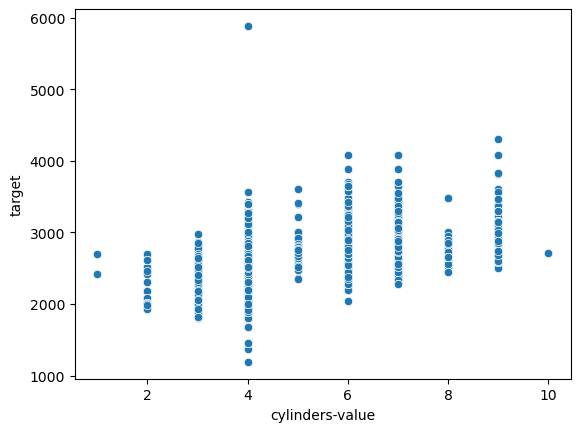

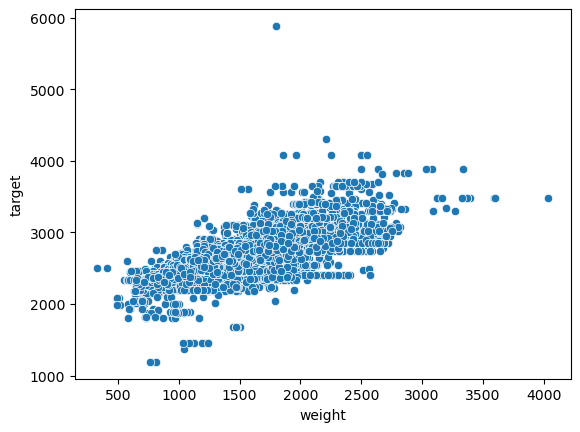

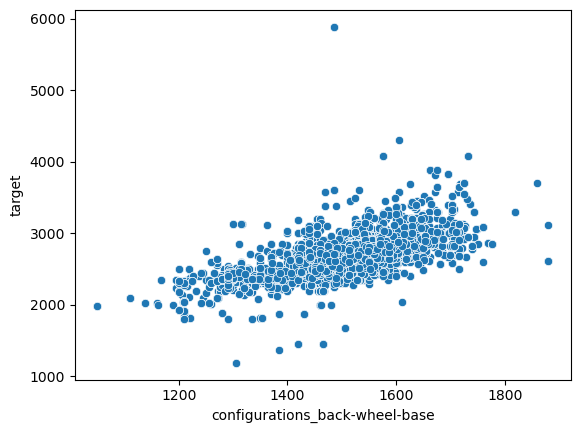

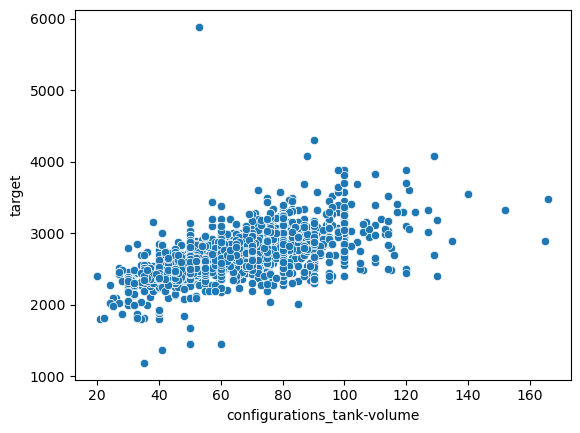

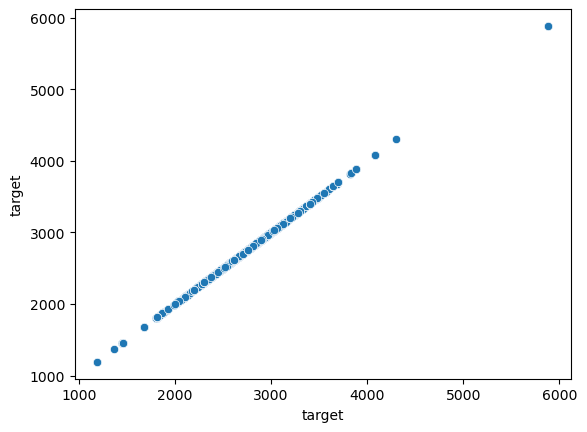

In [33]:
for factor in XX.columns:
    sns.scatterplot(data=XX, x=factor, y='target')
    plt.show()

In [56]:
score_of_your_data(XX)

0.6262605603035521

TypeError: score() missing 2 required positional arguments: 'X' and 'y'

### MinMaxScaler()

In [59]:
scaler = MinMaxScaler()

In [62]:
sc_XX = pd.DataFrame(scaler.fit_transform(XX), columns=XX.columns)

In [64]:
score_of_your_data(sc_XX)

0.6262605603035521

### Преобразования

In [69]:
poly = PolynomialFeatures(2)

In [95]:
poly_XX = poly.fit_transform(XX.drop('target', axis=1))

In [96]:
poly_XX

array([[1.000000e+00, 3.000000e+00, 8.200000e+02, ..., 1.690000e+06,
        5.200000e+04, 1.600000e+03],
       [1.000000e+00, 7.000000e+00, 2.350000e+03, ..., 2.418025e+06,
        1.679400e+05, 1.166400e+04],
       [1.000000e+00, 4.000000e+00, 1.350000e+03, ..., 2.353156e+06,
        8.437000e+04, 3.025000e+03],
       ...,
       [1.000000e+00, 4.000000e+00, 1.545000e+03, ..., 2.405601e+06,
        1.008150e+05, 4.225000e+03],
       [1.000000e+00, 4.000000e+00, 1.210000e+03, ..., 2.131600e+06,
        8.030000e+04, 3.025000e+03],
       [1.000000e+00, 5.000000e+00, 1.660000e+03, ..., 2.396304e+06,
        1.083600e+05, 4.900000e+03]])

In [98]:
y = XX.target
train_X, test_X, train_y, test_y = train_test_split(poly_XX, y, test_size=0.33, random_state=42)
reg = LinearRegression().fit(train_X, train_y)
reg.score(train_X, train_y)

0.6388209647850716